# Matplotlib annotations

In [38]:
import pandas as pd 
import duckdb

df = pd.read_csv ("data/1900-census-immigrant-pop-metro.csv")

df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Error,161.0,23.714286,36.455011,-95.0,0.0,10.0,55.00,100.0
Africa,120.0,11.033333,35.814633,1.0,1.0,3.0,7.25,357.0
"Asia (except China, Japan, and India)",133.0,53.421053,128.134352,1.0,6.0,18.0,45.00,925.0
Central America,98.0,25.530612,96.578071,1.0,2.0,4.0,15.00,920.0
Europe (not otherwise specified),82.0,11.548780,30.458291,1.0,2.0,4.0,9.00,223.0
India,117.0,9.444444,25.607261,1.0,1.0,4.0,8.00,250.0
Luxemburg,53.0,15.792453,49.796261,1.0,1.0,2.0,5.00,334.0
Pacific Islands (except Phillipine Islands),85.0,14.576471,47.640363,1.0,1.0,2.0,7.00,317.0
South America,135.0,20.592593,91.860317,1.0,2.0,4.0,11.00,995.0
Other countries,113.0,14.725664,33.408523,1.0,2.0,4.0,11.00,218.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [41]:
df["Total foreign born"].iloc[0]

'7,127'

In [42]:
columns = ["Sweden", "Norway", "Denmark", "Finland", "Total foreign born"]

df_nordic = df[columns]
df_nordic.head()

,Sweden,Norway,Denmark,Finland,Total foreign born
0,200,59,105,1,"7,127"
1,65,12,21,3,"17,718"
2,186,9,15,5,"30,216"
3,5,2,5,NaN,"2,991"
4,32,4,5,3,"3,301"


In [43]:
df_nordic = df_nordic.fillna("0")

In [44]:
for column in columns:
    df.loc[:, column] = df_nordic[column].str.replace(",","").astype(int)

df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,7127,4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,17718,3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,30216,4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,2991,NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,3301,2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [45]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sweden              161 non-null    object
 1   Norway              161 non-null    object
 2   Denmark             161 non-null    object
 3   Finland             161 non-null    object
 4   Total foreign born  161 non-null    object
dtypes: object(5)
memory usage: 6.4+ KB


In [54]:

df_nordic = duckdb.query(
    """--sql
    WITH nordic AS (
        FROM df
            SELECT 
                state, 
                SUM("Total foreign born") AS "Total foreigners",
                SUM(sweden) AS Swedes,
                SUM(norway) AS Norwegians,
                SUM(denmark) AS Danish,
                SUM(finland) AS Finnish,
            GROUP BY
             state
    )
    FROM nordic n 
    SELECT *, n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
    ORDER BY 
        nordic 
    DESC
"""
).df()

df_nordic.head()

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


TODO:
- more visualizations on Nordic
- more visualizations on Total foreigners
- ex bar charts for different states
- compare nordic to total foreigners

In [47]:
df_nordic.shape

(161, 5)

In [48]:
print(df_nordic.columns)

Index(['Sweden', 'Norway', 'Denmark', 'Finland', 'Total foreign born'], dtype='object')


In [55]:
import matplotlib.pyplot as plt

top_3_nordic = (
    df_nordic.drop(["Total foreigners", "Nordic"], axis=1).set_index("State").iloc[:3]
 )
top_3_nordic

,Swedes,Norwegians,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


<Axes: xlabel='State'>

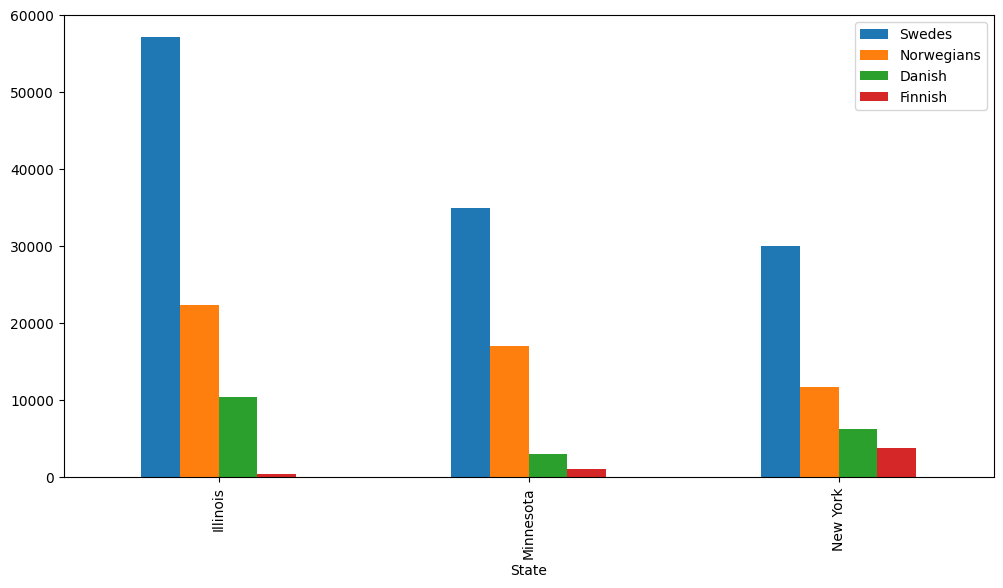

In [63]:
top_3_nordic.plot(kind = "bar", figsize = (12,6))


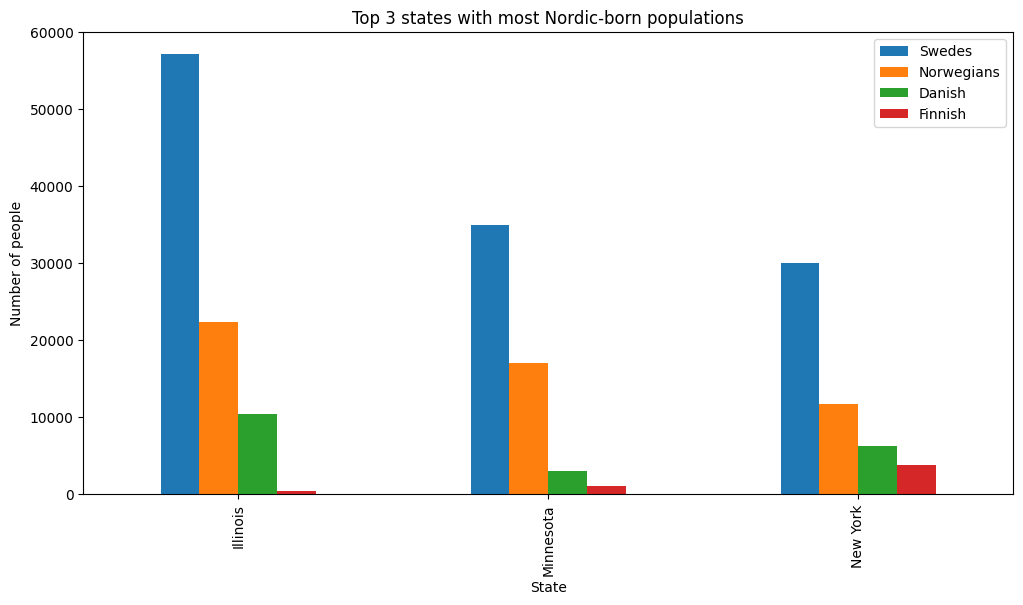

In [ ]:
# Skapa figures-mappen om den inte finns
os.makedirs("figures", exist_ok=True)

# Skapa figuren
ax = top_3_nordic.plot(kind="bar", figsize=(12, 6))

# Lägg till titel och axel-etiketter om du vill
plt.title("Top 3 states with most Nordic-born populations")
plt.ylabel("Number of people")
plt.xlabel("State")

# Spara figuren
plt.savefig("figures/top_3_nordic_barplot.png", bbox_inches="tight")

# Visa figuren (valfritt)
plt.show()


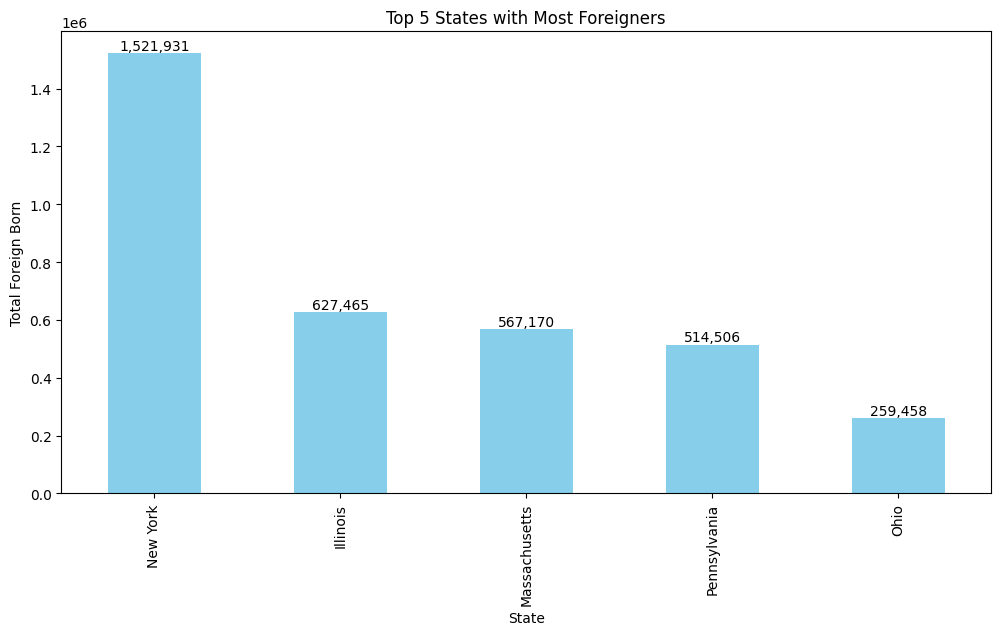

In [74]:


# Se till att kolumnen är numerisk
df_nordic["Total foreigners"] = (
    df_nordic["Total foreigners"]
    .astype(str)                              # ifall det är objekt/sträng
    .str.replace(",", "")                     # ta bort tusentalsavgränsare
    .astype(int)                              # konvertera till heltal
)

# Sortera och hämta top 5
top_5_foreigners = df_nordic.sort_values(by="Total foreigners", ascending=False).head(5)

# Plotta
ax = top_5_foreigners.set_index("State")["Total foreigners"].plot(
    kind="bar", figsize=(12, 6), color="skyblue"
)

plt.title("Top 5 States with Most Foreigners")
plt.ylabel("Total Foreign Born")
plt.xlabel("State")

# Lägg till värden ovanpå staplarna (valfritt)
for i, v in enumerate(top_5_foreigners["Total foreigners"]):
    ax.text(i, v + 500, f"{int(v):,}", ha='center', va='bottom')

# Spara bilden
plt.savefig("figures/top_5_states_foreigners.png", bbox_inches="tight")

# Visa grafen
plt.show()

## Annotate